In [2]:
genre_mapping = {
    "드라마": 1 << 43,
    "첩보": 1 << 42,
    "옴니버스": 1 << 41,
    "뮤직": 1 << 40,
    "동성애": 1 << 39,
    "로드무비": 1 << 38,
    "아동": 1 << 37,
    "하이틴(고교)": 1 << 36,
    "전기": 1 << 35,
    "청춘영화": 1 << 34,
    "재난": 1 << 33,
    "문예": 1 << 32,
    "연쇄극": 1 << 31,
    "신파": 1 << 30,
    "활극": 1 << 29,
    "반공/분단": 1 << 28,
    "군사": 1 << 27,
    "계몽": 1 << 26,
    "사회물(경향)": 1 << 25,
    "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23,
    "종교": 1 << 22,
    "무협": 1 << 21,
    "미스터리": 1 << 20,
    "SF": 1 << 19,
    "코메디": 1 << 18,
    "느와르": 1 << 17,
    "액션": 1 << 16,
    "범죄": 1 << 15,
    "어드벤처": 1 << 14,
    "가족": 1 << 13,
    "에로": 1 << 12,
    "멜로/로맨스": 1 << 11,
    '멜로드라마': 1 << 11,
    "공포": 1 << 10,
    "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8,
    '실험': 1 << 7,
    '스릴러': 1 << 5,
    '서부': 1 << 4,
    '전쟁': 1 << 3,
    '갱스터': 1 << 2,
    '판타지': 1 << 1,
    '해양액션': 1 << 0
}

In [3]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def titleList(fileName : str):
    
    movieNum = int(fileName.split('_')[1].split('.')[0]) #int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
        
    return titleListGenre

def get_image_data_list(folder_path, target_size=(400, 600)):
    # 지원하는 이미지 확장자
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
    # 이미지 데이터 목록을 저장할 리스트
    image_data_list = []
    image_genre_list = []
    # 폴더 내의 모든 파일을 순회
    for filename in os.listdir(folder_path):
        # 파일의 경로 생성
        file_path = os.path.join(folder_path, filename)
        
        # 파일이 이미지 확장자 중 하나인지 확인
        if filename.lower().endswith(image_extensions) and os.path.isfile(file_path):
            # 이미지를 열고 지정된 크기로 리사이즈
            # print(file_path, os.path.basename(file_path))
            img = Image.open(file_path)
            img_resized = img.resize(target_size)  # 크기 조정
            img_data = np.array(img_resized)  # 이미지를 NumPy 배열로 변환
            image_data_list.append(img_data)
            image_genre_list.append(titleList(os.path.basename(file_path)))

    return (image_data_list, image_genre_list)

# 예시 폴더 경로 (여기에 여러분의 이미지 폴더 경로를 입력하세요)
folder_path = r'G:\내 드라이브\project_poster\posters3'  
images_data, images_genre = get_image_data_list(folder_path)
# plt.imshow(images_data[0])
# 가져온 이미지 데이터 리스트의 크기 출력
for index, img_data in enumerate(images_data):
    print(f"Image {index + 1} shape: {img_data.shape} ", images_genre[index])


G:\내 드라이브\project_poster\posters3\고질라 킹 오브 몬스터_81920.jpg 고질라 킹 오브 몬스터_81920.jpg
G:\내 드라이브\project_poster\posters3\원티드_65568.jpg 원티드_65568.jpg
G:\내 드라이브\project_poster\posters3\킹스맨 시크릿 에이전트_344064.jpg 킹스맨 시크릿 에이전트_344064.jpg
G:\내 드라이브\project_poster\posters3\다크 나이트 라이즈_98336.jpg 다크 나이트 라이즈_98336.jpg
G:\내 드라이브\project_poster\posters3\베테랑_8796093087744.jpg 베테랑_8796093087744.jpg
G:\내 드라이브\project_poster\posters3\럭키_8796093284352.jpg 럭키_8796093284352.jpg
G:\내 드라이브\project_poster\posters3\30일_262144.jpg 30일_262144.jpg
G:\내 드라이브\project_poster\posters3\어바웃 타임_8796093286402.jpg 어바웃 타임_8796093286402.jpg
G:\내 드라이브\project_poster\posters3\히트맨_327680.jpg 히트맨_327680.jpg
G:\내 드라이브\project_poster\posters3\돈 룩 업_8796093808640.jpg 돈 룩 업_8796093808640.jpg
G:\내 드라이브\project_poster\posters3\셰이프 오브 워터 사랑의 모양_8796093038626.jpg 셰이프 오브 워터 사랑의 모양_8796093038626.jpg
G:\내 드라이브\project_poster\posters3\호빗 뜻밖의 여정_16386.jpg 호빗 뜻밖의 여정_16386.jpg
G:\내 드라이브\project_poster\posters3\신비한 동물사전_24578.jpg 신비한 동물사전_24578.jpg
G:

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

folder_path = r'G:\내 드라이브\project_poster\posters3'
folder_test_path = r'G:\내 드라이브\project_poster\posters3_test'

# 데이터 준비
# x_train: 이미지 데이터 (배치 크기, 높이, 너비, 채널 수)
# y_train: 라벨 데이터 (배치 크기, 클래스 수)
images_data, images_genre = get_image_data_list(folder_path)
x_train= np.array(images_data)
y_train= np.array(images_genre)

images_data_test, images_genre_test = get_image_data_list(folder_test_path)
x_test= np.array(images_data_test)
y_test= np.array(images_genre_test)

# num_classes = 3  # 예시: 고양이, 개, 새
# input_shape = (128, 128, 3)  # 입력 이미지 크기

# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=images_data[0].shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(images_genre[0]), activation='sigmoid')  # 각 클래스에 대해 확률 출력
])

# 모델 컴파일
# history = model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
# 모델 학습 코드 예시
history = model.fit(x_train, y_train, epochs=100, batch_size=1)

# 예측
predictions = model.predict(x_test)


# TODO : 테스트셋 만들것. .. 에포크 100으로 상향. 히스토리 받아서 그래프 출력

G:\내 드라이브\project_poster\posters3\고질라 킹 오브 몬스터_81920.jpg 고질라 킹 오브 몬스터_81920.jpg
G:\내 드라이브\project_poster\posters3\원티드_65568.jpg 원티드_65568.jpg
G:\내 드라이브\project_poster\posters3\킹스맨 시크릿 에이전트_344064.jpg 킹스맨 시크릿 에이전트_344064.jpg
G:\내 드라이브\project_poster\posters3\다크 나이트 라이즈_98336.jpg 다크 나이트 라이즈_98336.jpg
G:\내 드라이브\project_poster\posters3\베테랑_8796093087744.jpg 베테랑_8796093087744.jpg
G:\내 드라이브\project_poster\posters3\럭키_8796093284352.jpg 럭키_8796093284352.jpg
G:\내 드라이브\project_poster\posters3\30일_262144.jpg 30일_262144.jpg
G:\내 드라이브\project_poster\posters3\어바웃 타임_8796093286402.jpg 어바웃 타임_8796093286402.jpg
G:\내 드라이브\project_poster\posters3\히트맨_327680.jpg 히트맨_327680.jpg
G:\내 드라이브\project_poster\posters3\돈 룩 업_8796093808640.jpg 돈 룩 업_8796093808640.jpg
G:\내 드라이브\project_poster\posters3\셰이프 오브 워터 사랑의 모양_8796093038626.jpg 셰이프 오브 워터 사랑의 모양_8796093038626.jpg
G:\내 드라이브\project_poster\posters3\호빗 뜻밖의 여정_16386.jpg 호빗 뜻밖의 여정_16386.jpg
G:\내 드라이브\project_poster\posters3\신비한 동물사전_24578.jpg 신비한 동물사전_24578.jpg
G:

In [8]:
import matplotlib.pyplot as plt

history=model.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 490ms/step - accuracy: 0.2662 - loss: 0.0317
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 485ms/step - accuracy: 0.2737 - loss: 0.0055
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 487ms/step - accuracy: 0.5377 - loss: 0.0094
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 488ms/step - accuracy: 0.1864 - loss: 4.8586e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 491ms/step - accuracy: 0.1142 - loss: 4.0869e-05
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 489ms/step - accuracy: 0.2472 - loss: 2.9561e-05
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - accuracy: 0.2069 - loss: 2.0624e-05
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - accuracy: 0.2520 - loss: 1.3938e-05
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 481ms/step - accuracy: 0.4518 - loss: 1.3301e-05
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - accuracy: 0.2072 - loss: 1.1557e-05


In [10]:
history.history['accuracy']

[0.23999999463558197,
 0.36000001430511475,
 0.4000000059604645,
 0.2800000011920929,
 0.3199999928474426,
 0.3199999928474426,
 0.2800000011920929,
 0.2800000011920929,
 0.2800000011920929,
 0.2800000011920929]

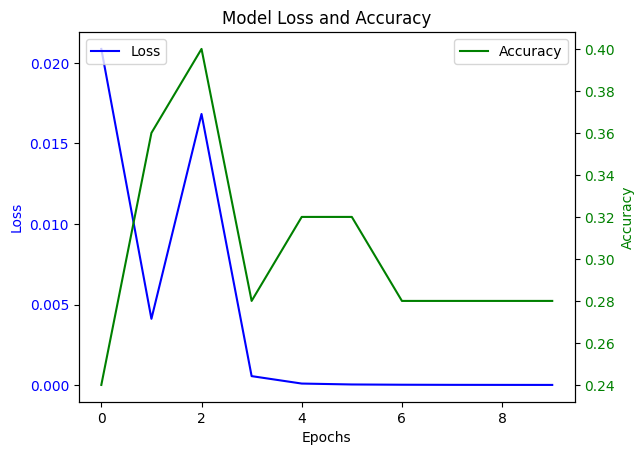

In [11]:
# 학습 기록으로 손실과 정확도 시각화
fig, ax1 = plt.subplots()

# 첫 번째 y축: 손실(Loss)
ax1.plot(history.history['loss'], color='blue', label='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: 정확도(Accuracy)
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], color='green', label='Accuracy')
ax2.set_ylabel('Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 그래프 제목 추가
plt.title('Model Loss and Accuracy')

# 범례(Legend) 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')